# Installing required packages

In [ ]:
# For speech recognition
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.0 MB/s eta 0:00:00


In [ ]:
# For working with audio
!pip3 install pyaudio

In [ ]:
# For downloading YouTube videos
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
# For audio processing
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054405 sha256=ec88728ffce341b0ef97143922f65b92de0e7774660f35b7db0269156d64b88b
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [ ]:
# Ensure the latest version
!pip install simpleaudio --upgrade

In [ ]:
# For audio processing
!pip install pydub

In [ ]:
pip install yt-dlp requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.7 MB/s eta 0:00:00


# Importing necessary libraries

In [ ]:
import torch  # PyTorch library
import librosa  # For audio analysis
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import soundfile as sf  # For reading and writing sound files
import matplotlib.pyplot as plt

In [ ]:
from scipy.io import wavfile  # For reading WAV files
from IPython.display import Audio  # For displaying audio in Jupyter
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer  # Transformers library
from tensorflow.keras.models import Sequential  # Keras sequential model
from tensorflow.keras.layers import Embedding, Dropout  # Keras layers
from pytube import YouTube  # For downloading YouTube videos

# Downloading YouTube video

In [ ]:
from pytube import YouTube

SAVE_PATH = "/content"

link = "https://youtu.be/pMf1LHd8gy4?si=a9J1m0pYLfIAtO66"

try:
    yt = YouTube(link)
except:
    print("Connection Error")

# Set the filename for the video
filename = "video.mp4"

# Get the highest resolution mp4 stream
mp4_stream = yt.streams.filter(file_extension='mp4').get_highest_resolution()

if mp4_stream:
    try:
        # Download the video with the specified filename
        mp4_stream.download(output_path=SAVE_PATH, filename=filename)
        print(f'Video downloaded successfully as "{filename}"!')
    except:
        print("Some Error occurred while downloading!")
else:
    print("No mp4 stream available for this video.")

print('Task Completed!')

Video downloaded successfully as "video.mp4"!
Task Completed!


# Extracting audio from video

In [ ]:
import moviepy.editor

try:
    video = moviepy.editor.VideoFileClip("video.mp4")
    audio = video.audio
    audio.write_audiofile("sample.wav")
    print("Audio extraction completed!")
except Exception as e:
    print(f"Error during audio extraction: {e}")

# Converting audio to text and saving to CSV

In [ ]:
import speech_recognition as sr
import wave
import csv

# Initialize recognizer
r = sr.Recognizer()

def get_audio_duration(file_path):
    with wave.open(file_path, 'rb') as wf:
        frames = wf.getnframes()
        rate = wf.getframerate()
        duration = frames / float(rate)
    return duration

# Function to convert audio file to text and save to CSV
def convert_audio_to_text(file_path, output_csv_path):
    audio_duration = get_audio_duration(file_path)

    if audio_duration is not None:
        print(f"Audio duration of the WAV file: {audio_duration} seconds")
    else:
        print("Failed to get audio duration.")
        return

    output_data = []  # To store the output text

    with sr.AudioFile(file_path) as source:
        # Adjust these parameters based on your needs
        chunk_size = 5  # seconds

        offset = 0
        total_duration = audio_duration

        while offset < total_duration:
            audio_text = r.listen(source, timeout=chunk_size, phrase_time_limit=chunk_size)

            try:
                text = r.recognize_google(audio_text)
                print(f"Converted audio chunk: {text}")
                output_data.append(text)
            except sr.UnknownValueError:
                print("Google Speech Recognition could not understand audio")
                #output_data.append("")  # Add an empty string for unknown values
            except sr.RequestError as e:
                print(f"Could not request results from Google Speech Recognition service; {e}")

            offset += chunk_size

    # Save the output to CSV
    with open(output_csv_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(["comment_text"])  # Header
        csv_writer.writerows([[text] for text in output_data])

# Example usage
convert_audio_to_text('sample.wav', 'output.csv')


Audio duration of the WAV file: 808.4 seconds
Google Speech Recognition could not understand audio
Google Speech Recognition could not understand audio
Converted audio chunk: hello welcome to my new class my name is
Converted audio chunk: this lesson is specially meant for those people who are
Converted audio chunk: what's 18 and who can use the discretion as we will be talking about
Converted audio chunk: about some of the most notorious words in English language as
Converted audio chunk: what you may notice I've written some words and if you think these words are very offensive
Converted audio chunk: may I get offended by the video well this is a time to press the stop
Converted audio chunk: and move on to another video for the rest of us I will be talking about
Converted audio chunk: I'm telling you about few words that are extremely notorious extremely Prov
Converted audio chunk: but it is meant only for those people just to protect all
Converted audio chunk: when is your learning 

# Extracting the comments from the video and saving to csv

In [ ]:
import csv
from yt_dlp import YoutubeDL

def extract_comments_to_csv(video_url, output_csv):
    # Options for YoutubeDL
    opts = {
        "getcomments": True
    }

    # Create a YoutubeDL instance
    with YoutubeDL(opts) as yt:
        # Extract information about the video (including comments)
        info = yt.extract_info(video_url, download=False)

        # Get comments and thread count
        comments = info["comments"]
        thread_count = info["comment_count"]

        # Print the number of threads
        print("Number of threads: {}".format(thread_count))

        # Write comments to CSV file
        with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(["Comment"])  # Header
            for comment in comments:
                csv_writer.writerow([comment['text']])

# Example usage
video_url = link
output_csv = "comments.csv"
extract_comments_to_csv(video_url, output_csv)

[youtube] Extracting URL: https://youtu.be/pMf1LHd8gy4?si=a9J1m0pYLfIAtO66
[youtube] pMf1LHd8gy4: Downloading webpage
[youtube] pMf1LHd8gy4: Downloading ios player API JSON
[youtube] pMf1LHd8gy4: Downloading android player API JSON
[youtube] pMf1LHd8gy4: Downloading m3u8 information
[youtube] Downloading comment section API JSON
[youtube] Downloading ~522 comments
[youtube] Sorting comments by newest first
[youtube] Downloading comment API JSON page 1 (0/~522)
[youtube]     Downloading comment API JSON reply thread 1 (1/~522)
[youtube] Downloading comment API JSON page 2 (26/~522)
[youtube] Downloading comment API JSON page 3 (46/~522)
[youtube] Downloading comment API JSON page 4 (66/~522)
[youtube]     Downloading comment API JSON reply thread 1 (69/~522)
[youtube]     Downloading comment API JSON reply thread 2 (81/~522)
[youtube]     Downloading comment API JSON reply thread 3 (87/~522)
[youtube] Downloading comment API JSON page 5 (93/~522)
[youtube]     Downloading comment API JS

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preparing for machine learning model

In [ ]:
import tensorflow as tf  # TensorFlow library
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization
from tensorflow.keras.preprocessing import text, sequence  # Text preprocessing
from tensorflow.keras.layers import Dense, Dropout, Activation  # Keras layers
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D  # Keras layers
from sklearn.model_selection import train_test_split  # For splitting data
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv').fillna(' ')

# Display a sample of the dataset
train_df.sample(10, random_state = 1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
12345,20bc45f5014c1eca,"""\n\nYour latest edit has again had to be remo...",0,0,0,0,0,0
55587,948580166b8b8745,"""\n\nWorks for me. BaStun not BaTsun """,0,0,0,0,0,0
16877,2c8519885db5c0bb,List of newspapers in India by readership\n\nT...,0,0,0,0,0,0
140039,ed64d530a34aa973,Happy New Years\nCheers ),0,0,0,0,0,0
125777,a0dd897eafbada2c,Photos \nSouthwestern’s official website has m...,0,0,0,0,0,0
159512,ff2f5695bb9aa845,"How's this? It's a lot shorter, but it's more ...",0,0,0,0,0,0
121612,8aa46e67645e4b7b,Why did you remove skinwalker instead of movin...,0,0,0,0,0,0
7588,142d9e745d03c9ef,"""I repeat, the text was about a minority schoo...",0,0,0,0,0,0
9463,191a1c6bd40ad470,bay pigs article \n\nhi i noticed that you wer...,1,0,1,0,0,0
103236,287b2d375ed7188a,"MusikAnimal is a liar, a disinformant and plag...",0,0,0,0,0,0


In [ ]:
# Extract comments and labels
x = train_df['comment_text'].values
print(x)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [ ]:
y = train_df['toxic'].values
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
train_df.loc[train_df['toxic'] == 1].sample(10, random_state=1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
86296,e6cfe09510b15145,and are Angelique KKKarrington-hating Jews!]],1,0,0,0,0,0
8619,16e110672dde00d9,How civil is this - who the fuck do you think ...,1,1,1,0,1,0
123695,958e4d243a743156,"""\n\n idiot \n\n i do not understand what use...",1,0,1,0,1,0
120058,820861d281284864,"""::I'd hoped for a better, more neutral respon...",1,0,0,0,0,0
157801,e381fcf1759b1d0f,"""\n\nComments from the west are irrelevant, we...",1,0,0,0,0,0
132607,c57242ec5816d21c,"""\n\nYOUR MOM IS SO FAT, SHE GETS CASHBACK WHE...",1,1,1,0,1,1
73811,c580d59f2a359dcc,"[User talk:JesseRafe|talk]], How dare you call...",1,0,0,0,1,0
17995,2f85b9f5219235df,"to be honest with you, if you don't tell me a ...",1,0,0,0,0,0
45799,7a675e86c2e62890,"P.S. I need some penis, cat tongue is getting old",1,0,1,0,0,0
148162,47cf25a86ba2dc49,FUCK ALL MODERNISTS \n\nI WISH THE ROMAN EMPIR...,1,0,1,0,0,0


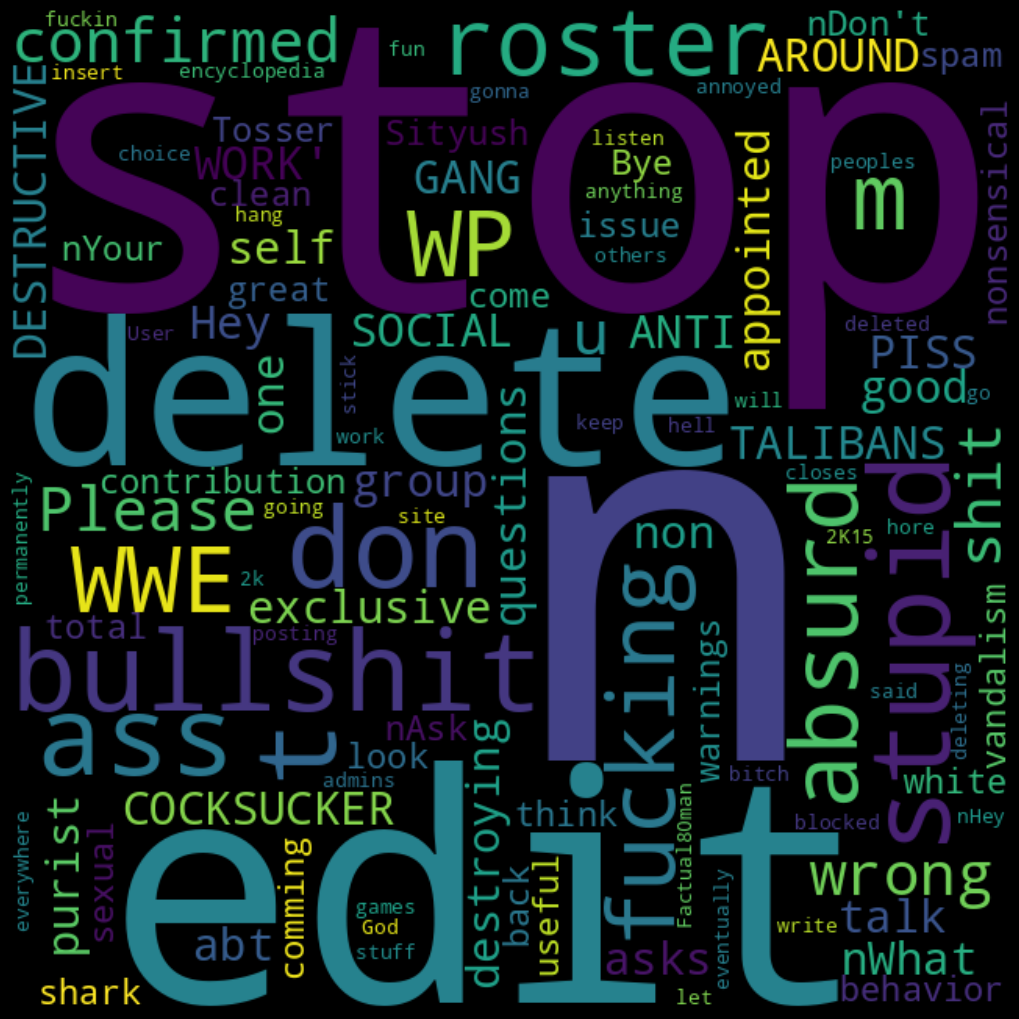

In [ ]:
# Generate a word cloud for toxic comments
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))

# Display the generated word cloud
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

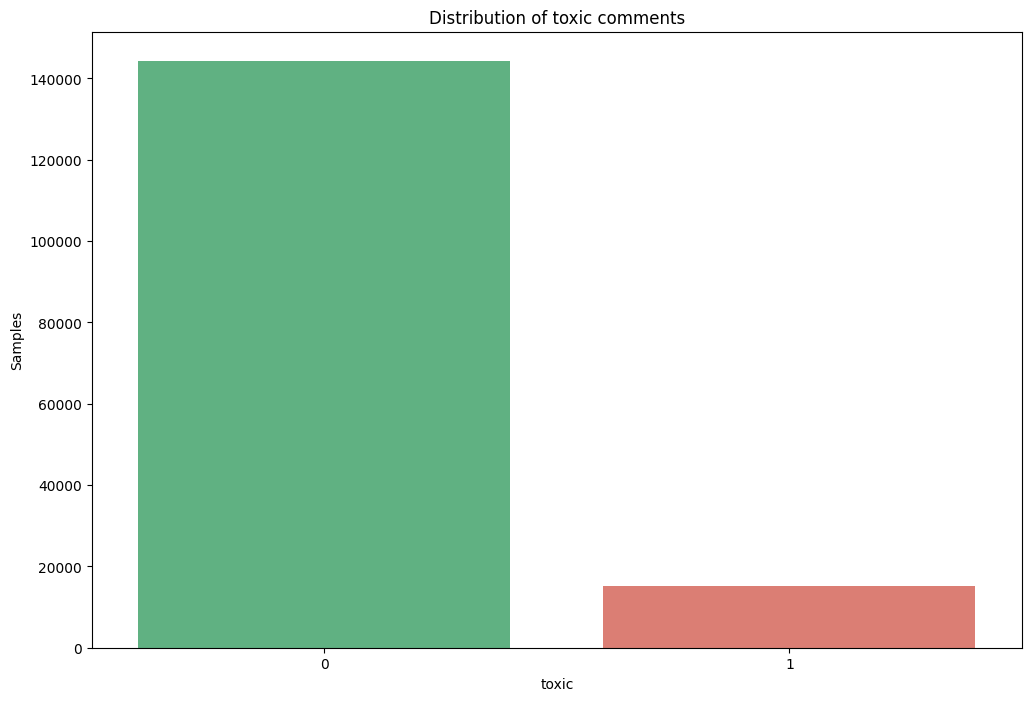

In [ ]:
# Plot frequency of toxic comments (0 = not toxic, 1 = toxic)
green = '#52BE80'
red = '#EC7063'

plt.figure(figsize=(12, 8))
ax = sns.countplot(x=train_df['toxic'], palette=[green, red], hue=train_df['toxic'])
ax.set_title('Distribution of toxic comments')
ax.set_ylabel('Samples')
ax.legend_.remove()  # To remove the legend if not needed
plt.show()

In [ ]:
# Counts of comments (0 = not toxic, 1 = toxic)
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

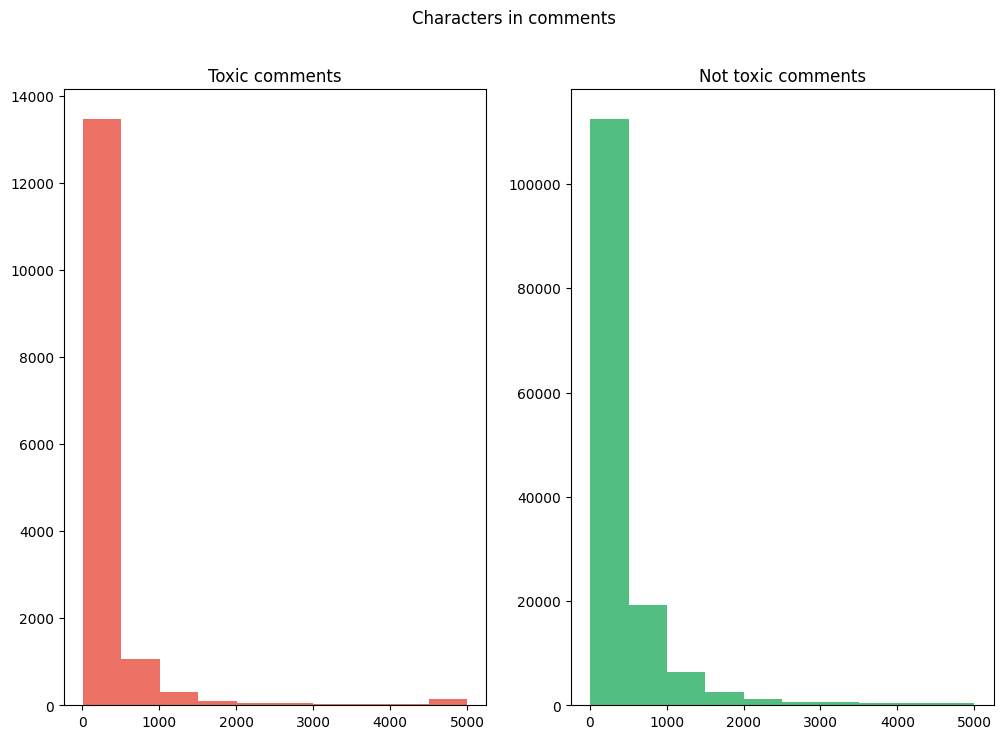

In [ ]:
# Plot the distribution of characters in comments
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.len()
ax1.hist(comment_len,color=red)
ax1.set_title('Toxic comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.len()
ax2.hist(comment_len,color=green)
ax2.set_title('Not toxic comments')
fig.suptitle('Characters in comments')
plt.show()

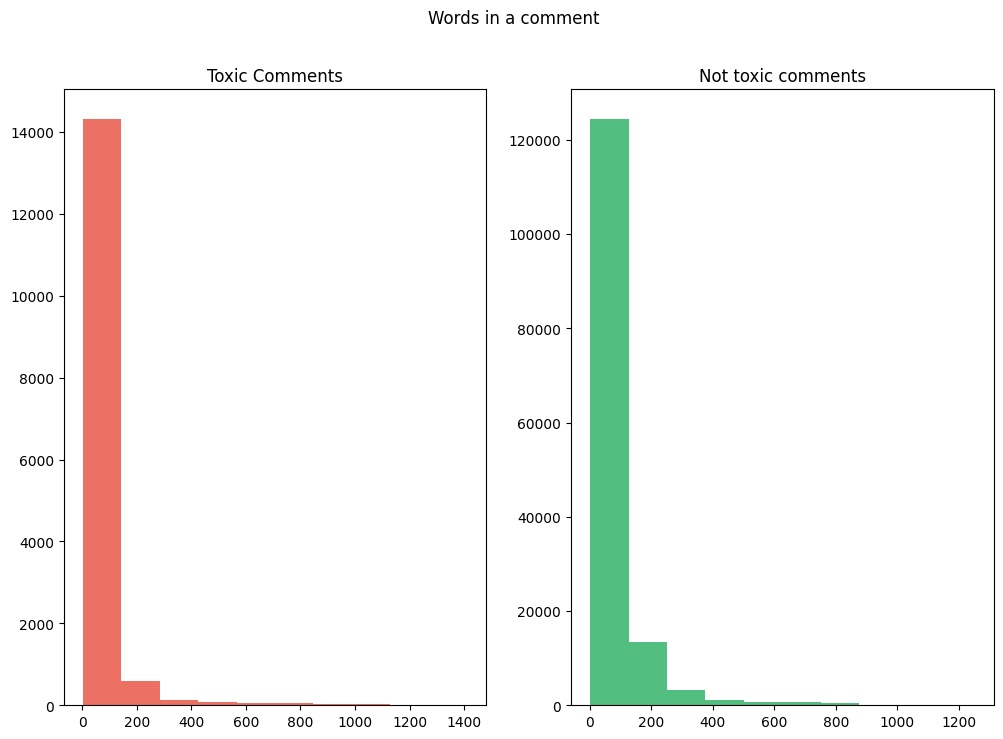

In [ ]:
# Plot the distribution of words in comments
fig,(ax1,ax2)=plt.subplots(1,2,figsize = (12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(comment_len,color = red)
ax1.set_title('Toxic Comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(comment_len,color = green)
ax2.set_title('Not toxic comments')
fig.suptitle('Words in a comment')
plt.show()

In [ ]:
# Define some hyperparameters for performing tokenization
max_features = 20000
max_text_length = 100


# Tokenize and pad the comments
x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen = max_text_length)

In [ ]:
# Load pre-trained word embeddings (GloVe)
embedding_dim = 100
embeddings_index = dict()

f = open('/content/drive/MyDrive/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Create an embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features -1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
embeddings_index.get('hello')

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [ ]:
# Display the model structure
model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))

In [ ]:
# Define convolutional neural network parameters
filters = 150
kernel_size = 3
hidden_dims = 150

In [ ]:
# Build the convolutional neural network
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 150)         45150     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 150)         0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, None, 150)         67650     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 150)               0         
 obalMaxPooling1D)                                    

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the machine learning model

In [ ]:
# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
Epoch 1/10
1746/1746 [==============================] - 160s 91ms/step - loss: 0.1585 - accuracy: 0.9430 - val_loss: 0.1370 - val_accuracy: 0.9482
Epoch 2/10
1746/1746 [==============================] - 154s 88ms/step - loss: 0.1274 - accuracy: 0.9537 - val_loss: 0.1202 - val_accuracy: 0.9559
Epoch 3/10
1746/1746 [==============================] - 157s 90ms/step - loss: 0.1152 - accuracy: 0.9568 - val_loss: 0.1150 - val_accuracy: 0.9587
Epoch 4/10
1746/1746 [==============================] - 154s 88ms/step - loss: 0.1085 - accuracy: 0.9591 - val_loss: 0.1131 - val_accuracy: 0.9584
Epoch 5/10
1746/1746 [==============================] - 158s 90ms/step - loss: 0.1030 - accuracy: 0.9616 - val_loss: 0.1113 - val_accuracy: 0.9600
Epoch 6/10
1746/1746 [==============================] - 155s 89ms/step - loss: 0.0971 - accuracy: 0.9637 - val_loss: 0.1200 - val_accuracy: 0.9545
Epoch 7/10
1746/1746 [==============================] 

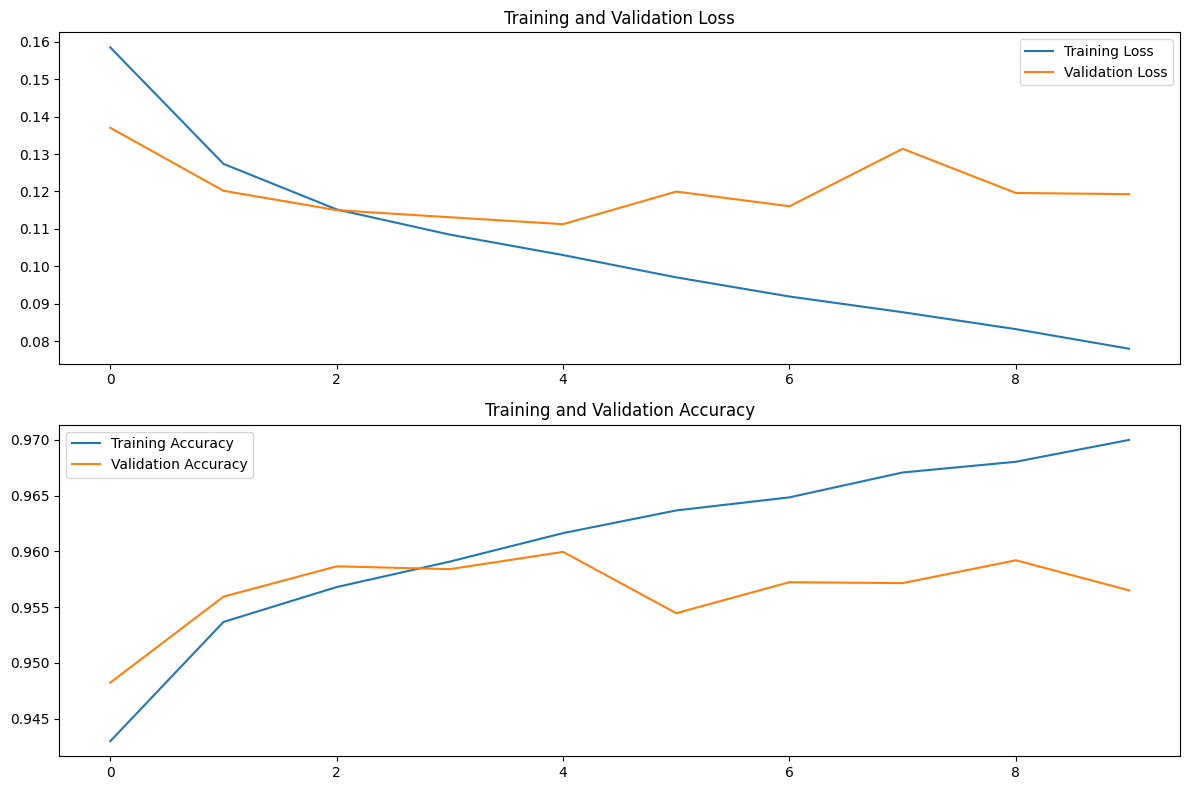

In [ ]:
# Train the model, iterating on the data in batches of 64 samples
%time
batch_size = 64
epochs = 10

# Fit the model and record training history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Visualize training and validation loss and accuracy
plt.figure(figsize=(12, 8))

# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Making predictions on test data

In [ ]:
# Read the test data from the output CSV file
test_df = pd.read_csv('/content/output.csv', encoding='ISO-8859-1')

# Extract the comment_text column from the test data
x_test = test_df['comment_text'].values
print(x_test)

['hello welcome to my new class my name is'
 'this lesson is specially meant for those people who are'
 "what's 18 and who can use the discretion as we will be talking about"
 'about some of the most notorious words in English language as'
 "what you may notice I've written some words and if you think these words are very offensive"
 'may I get offended by the video well this is a time to press the stop'
 'and move on to another video for the rest of us I will be talking about'
 "I'm telling you about few words that are extremely notorious extremely Prov"
 'but it is meant only for those people just to protect all'
 'when is your learning English and the Very at the beginning stage okay'
 "so in case if you're talking to someone and the other person uses"
 'these words on you you know that this conversation is not head'
 'play the direction you wanted so you may want to come out of that conversation'
 "this is what the lesson is all about let's start with some words which are used in"


In [ ]:
# Tokenize and pad the sequences for the test data
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

# Make predictions on the test data
y_testing = model.predict(x_testing, verbose=1, batch_size=64)

3/3 [==============================] - 0s 16ms/step


In [ ]:
# Display the shape of the predicted values
y_testing.shape

(144, 1)

In [ ]:
y_testing[34]

array([0.00087132], dtype=float32)

In [ ]:
# Create a new column 'Toxic' based on the predicted values
test_df['Toxic'] = ['not toxic' if x < 0.5 else 'toxic' for x in y_testing]

# Display the head of the DataFrame with comment_text and Toxic columns
test_df[['comment_text', 'Toxic']].head(50)

,comment_text,Toxic
0,hello welcome to my new class my name is,not toxic
1,this lesson is specially meant for those peopl...,not toxic
2,what's 18 and who can use the discretion as we...,not toxic
3,about some of the most notorious words in Engl...,not toxic
4,what you may notice I've written some words an...,not toxic
5,may I get offended by the video well this is a...,not toxic
6,and move on to another video for the rest of u...,not toxic
7,I'm telling you about few words that are extre...,not toxic
8,but it is meant only for those people just to ...,not toxic
9,when is your learning English and the Very at ...,not toxic


# Classifying toxic comments and updating DataFrame

In [ ]:
# Load the existing output.csv file
output_file_path = '/content/output.csv'  # Replace with the correct path
output_df = pd.read_csv(output_file_path, encoding='ISO-8859-1')

# Assuming you have made predictions (y_testing)
# Create a new column for toxic predictions
output_df['Toxic_Prediction'] = ['toxic' if x >= 0.5 else 'not toxic' for x in y_testing]

# Save the updated DataFrame to the output.csv file
output_df.to_csv(output_file_path, index=False)

In [ ]:
# Display the head of the DataFrame
print(output_df.head(40))

                                         comment_text Toxic_Prediction
0            hello welcome to my new class my name is        not toxic
1   this lesson is specially meant for those peopl...        not toxic
2   what's 18 and who can use the discretion as we...        not toxic
3   about some of the most notorious words in Engl...        not toxic
4   what you may notice I've written some words an...        not toxic
5   may I get offended by the video well this is a...        not toxic
6   and move on to another video for the rest of u...        not toxic
7   I'm telling you about few words that are extre...        not toxic
8   but it is meant only for those people just to ...        not toxic
9   when is your learning English and the Very at ...        not toxic
10  so in case if you're talking to someone and th...        not toxic
11  these words on you you know that this conversa...        not toxic
12  play the direction you wanted so you may want ...        not toxic
13  th

# Making predictions on test data(comments)

In [ ]:
# Read the test data from the output CSV file
test_df = pd.read_csv('/content/comments.csv', encoding='ISO-8859-1')

# Extract the comment_text column from the test data
x_test = test_df['Comment'].values
print(x_test)

['â\x9c\x85 Follow Interesting stories on Instagram - @letstalkpodcast\nhttp://www.instagram.com/letstalkpodcast\n\nâ\x9c\x85 Stop Asking â\x80\x98HOW ARE YOUâ\x80\x99. Learn Some Interesting English Greetings.\nhttps://www.youtube.com/watch?v=6y0vOQ9R3EI\n\nð\x9f\x91\x89 Funny English Video - Mumbai Ka Bhai Learns English\nhttps://www.youtube.com/watch?v=kyfZVLTmKo'
 "Learn English with Let's Talk - Free English Lessons \nyou're a good teacher .ð\x9f\x91\x8c"
 "Its All About A Habit...ð\x9f¤\x97\nYou Use A Bad Language In Your Personal Life... That Carries To Your Professional Life Too... ð\x9f\x99\x84\nI Prefer Not To Use Bad Words Anywhere ... That's Much Better...!! â\x98ºï¸\x8f"
 'What is the respectful word which we can use instead of negro??'
 'Can we get the pdf'
 'You are amazing â\x9d£ï¸\x8fâ\x9d¤ï¸\x8fâ\x9d£ï¸\x8fð\x9f\x98\x8dâ\x9d£ï¸\x8f'
 'Q' 'Me ð\x9f\x98\x82'
 'Itâ\x80\x99s interesting as a native English speaker to see what non-native speakers think of out swear words a

In [ ]:
# Tokenize and pad the sequences for the test data
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

# Make predictions on the test data
y_testing = model.predict(x_testing, verbose=1, batch_size=64)

9/9 [==============================] - 0s 21ms/step


In [ ]:
# Display the shape of the predicted values
y_testing.shape

(522, 1)

In [ ]:
# Create a new column 'Toxic' based on the predicted values
test_df['Toxic'] = ['not toxic' if x < 0.5 else 'toxic' for x in y_testing]

# Display the head of the DataFrame with comment_text and Toxic columns
test_df[['Comment', 'Toxic']].head(50)

,Comment,Toxic
0,â Follow Interesting stories on Instagram - ...,not toxic
1,Learn English with Let's Talk - Free English L...,not toxic
2,Its All About A Habit...ð¤\nYou Use A Bad La...,not toxic
3,What is the respectful word which we can use i...,not toxic
4,Can we get the pdf,not toxic
5,You are amazing â£ï¸â¤ï¸â£ï¸ðâ£ï¸,not toxic
6,Q,not toxic
7,Me ð,not toxic
8,Itâs interesting as a native English speaker...,not toxic
9,Part of learning a language is learning a cult...,not toxic


# Classifying toxic comments and updating DataFrame

In [ ]:
# Load the existing output.csv file
output_file_path = '/content/comments.csv'  # Replace with the correct path
output_df = pd.read_csv(output_file_path, encoding='ISO-8859-1')

# Assuming you have made predictions (y_testing)
# Create a new column for toxic predictions
output_df['Toxic_Prediction'] = ['toxic' if x >= 0.5 else 'not toxic' for x in y_testing]

# Save the updated DataFrame to the output.csv file
output_df.to_csv(output_file_path, index=False)

In [ ]:
# Display the head of the DataFrame
print(output_df.head(40))

                                              Comment Toxic_Prediction
0   â Follow Interesting stories on Instagram - ...        not toxic
1   Learn English with Let's Talk - Free English L...        not toxic
2   Its All About A Habit...ð¤\nYou Use A Bad La...        not toxic
3   What is the respectful word which we can use i...        not toxic
4                                  Can we get the pdf        not toxic
5        You are amazing â£ï¸â¤ï¸â£ï¸ðâ£ï¸        not toxic
6                                                   Q        not toxic
7                                             Me ð        not toxic
8   Itâs interesting as a native English speaker...        not toxic
9   Part of learning a language is learning a cult...        not toxic
10               Madam is just trying to teach usð        not toxic
11                                        Meeeeeeð        not toxic
12                                       Where N word        not toxic
13  Ot

# Evaluating the machine learning model

1496/1496 [==============================] - 23s 15ms/step
Accuracy: 0.9565
Precision: 0.7821
Recall: 0.7579
F1 Score: 0.7698


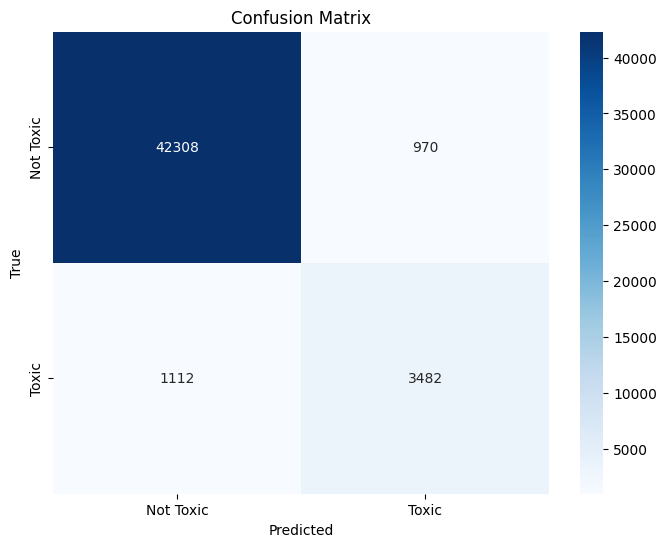


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43278
           1       0.78      0.76      0.77      4594

    accuracy                           0.96     47872
   macro avg       0.88      0.87      0.87     47872
weighted avg       0.96      0.96      0.96     47872



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, x_val, y_val):
    # Evaluate performance on the validation set
    y_pred = model.predict(x_val)
    y_pred_classes = np.round(y_pred)

    # Performance metrics
    accuracy = accuracy_score(y_val, y_pred_classes)
    precision = precision_score(y_val, y_pred_classes)
    recall = recall_score(y_val, y_pred_classes)
    f1 = f1_score(y_val, y_pred_classes)

    # Classification report
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

    # Confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred_classes)

    # Confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_classes))

# Use the evaluate_model function after training the model
evaluate_model(model, x_val, y_val)